# Visualization of results in this study

In [15]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.metrics import roc_curve, precision_recall_curve, auc

## Figure2: Model construction and evalution

In [5]:
## 算法比较 (比较 RandomForest, AdaBoost, XGBoost, SVM, KNN, Naive Bayes 的交叉验证结果，可视化 AUROC和AUPRC)
dt_res = []

## Randomforest
dt_randomforest = pd.read_csv("./tmp_res/basemodelcvlog-randomforest-partparam-500-None-2-1-None.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_randomforest.shape[0]):
    dt_res.append(["RandomForest", "AUROC", dt_randomforest["AUROC"][i]])
    dt_res.append(["RandomForest", "AUPRC", dt_randomforest["AUPRC"][i]])

## AdaBoost
dt_adaboost = pd.read_csv("./tmp_res/basemodelcvlog-adaboost-300-0.1.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_adaboost.shape[0]):
    dt_res.append(["AdaBoost", "AUROC", dt_adaboost["AUROC"][i]])
    dt_res.append(["AdaBoost", "AUPRC", dt_adaboost["AUPRC"][i]])

## XGBoost
dt_xgboost = pd.read_csv("./tmp_res/basemodelcvlog-xgboost-500-0.1.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_xgboost.shape[0]):
    dt_res.append(["XGBoost", "AUROC", dt_xgboost["AUROC"][i]])
    dt_res.append(["XGBoost", "AUPRC", dt_xgboost["AUPRC"][i]])

## SVM
dt_svm = pd.read_csv("./tmp_res/basemodelcvlog-svm-1.0-scale.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_svm.shape[0]):
    dt_res.append(["SVM", "AUROC", dt_svm["AUROC"][i]])
    dt_res.append(["SVM", "AUPRC", dt_svm["AUPRC"][i]])

## KNN
dt_knn = pd.read_csv("./tmp_res/basemodelcvlog-knn-9.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_knn.shape[0]):
    dt_res.append(["KNN", "AUROC", dt_knn["AUROC"][i]])
    dt_res.append(["KNN", "AUPRC", dt_knn["AUPRC"][i]])

## Naive Bayes
dt_naivebayes = pd.read_csv("./tmp_res/basemodelcvlog-naivebayes.txt", sep="\t", names=["TestI", "ValI", "Accuracy", "Precision", "Recall", "F1-Score", "AUROC", "AUPRC"])
for i in range(dt_naivebayes.shape[0]):
    dt_res.append(["NaiveBayes", "AUROC", dt_naivebayes["AUROC"][i]])
    dt_res.append(["NaiveBayes", "AUPRC", dt_naivebayes["AUPRC"][i]])

dt_res_methods_compare = pd.DataFrame(dt_res, columns=["Method", "Metric", "Value"])
dt_res_methods_compare.to_csv("./tmp_res/dt_fig2.csv", sep="\t", index=False)

### Figure 2. A: Selection of base machine learning algorithm via 5-fold cross-validation on training datasets

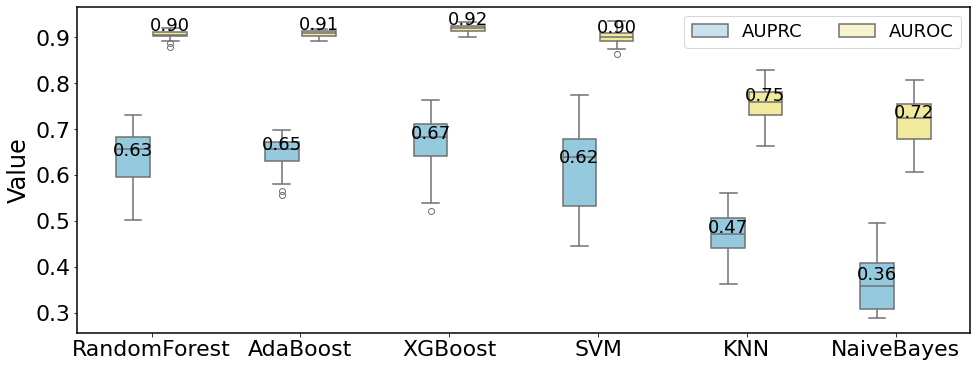

In [8]:
from pandas.api.types import CategoricalDtype

# read data
dt = pd.read_csv("./tmp_res/dt_fig2.csv", sep="\t")

# pre-set
metric_order = ["AUPRC", "AUROC"]
dt["Metric"] = dt["Metric"].astype(CategoricalDtype(categories=metric_order, ordered=True))
custom_palette = {"AUPRC": "#87CEEB", "AUROC": "#FFF68F"}

# figsize
plt.figure(figsize=(16, 6))

# boxplot, adjust width and dodge
ax = sns.boxplot(
    x="Method", y="Value", hue="Metric", data=dt,
    width=0.5,
    gap=0.1, 
    palette=custom_palette,
    dodge=True,
    showfliers=True,
    linewidth=1.5
)

# set transparency
for patch in ax.patches:
    facecolor = patch.get_facecolor()
    patch.set_facecolor((*facecolor[:3], 0.5))


# annotate with mean value of auroc and auprc
means = dt.groupby(["Method", "Metric"])["Value"].mean().reset_index()
methods = dt["Method"].unique()
n_metrics = len(metric_order)
width = 0.5
dodge_width = width / n_metrics 

for i, method in enumerate(methods):
    for j, metric in enumerate(metric_order):
        mean_value = means[(means["Method"] == method) & (means["Metric"] == metric)]["Value"]
        if not mean_value.empty:
            mean_value = mean_value.values[0]
            x_pos = i - (width / 2) + (j + 0.5) * dodge_width
            plt.text(x_pos, mean_value, f"{mean_value:.2f}", ha='center', va='bottom', fontsize=18, color="black")

# adjust coordinate axis and legend
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel("")
plt.ylabel("Value", fontsize=24)

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

handles, labels = ax.get_legend_handles_labels()

plt.legend(handles, labels, title="", loc='upper right', bbox_to_anchor=(1, 1), ncol=2, fontsize=18)

# 保存为高分辨率PDF
plt.savefig("./FigForPaper/Fig2A.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight",  # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距

plt.show()


### Figure 2B. Performance evaluation and comparison analysis of vhPPIpred against published methods on test datasets

In [9]:
## vhppipred
dt_vhppipred = pd.read_csv("./tmp_res/vhppipred_ourdt_res.txt", sep="\t", header=0)
dict_vhid_label = {}
for i  in range(dt_vhppipred.shape[0]):
    dict_vhid_label[dt_vhppipred["virus_unid"][i]+"-"+dt_vhppipred["human_unid"][i]] = dt_vhppipred["label"][i]
    dict_vhid_label[dt_vhppipred["virus_unid"][i].split(".")[0]+"-"+dt_vhppipred["human_unid"][i]] = dt_vhppipred["label"][i]
    
plot_dt_vhppipred = dt_vhppipred.loc[:, ["label","pred_score"]]
plot_dt_vhppipred["method"] = ["vhPPIpred",]*plot_dt_vhppipred.shape[0]

## hvppi
dt_hvppi = pd.read_csv("./tmp_res/hvppi_ourdt_res_095.txt", sep="\t", header=0)
plot_dt_hvppi = []
for i in range(dt_hvppi.shape[0]):
    vid = dt_hvppi["Virus_Protein_ID"][i]
    hid = dt_hvppi["Human_Protein_ID"][i]
    pred_score = dt_hvppi["Score"][i]
    plot_dt_hvppi.append([dict_vhid_label[vid+"-"+hid], pred_score])
plot_dt_hvppi = pd.DataFrame(plot_dt_hvppi, columns=["label","pred_score"])
plot_dt_hvppi["method"] = ["HVPPI",]*plot_dt_hvppi.shape[0]

## lstm-phv
dt_lstm_phv = pd.read_csv("./tmp_res/lstmphv_ourdt_res.txt", sep="\t", header=0)
pred_score_new = []
for i in range(dt_lstm_phv.shape[0]):
    if dt_lstm_phv["label_str"][i]!="not predicted":
        pred_score_new.append(dt_lstm_phv["pred_score"][i])
    else:
        if dt_lstm_phv["label"][i]==1.0:
            pred_score_new.append(0.0)
        else:
            pred_score_new.append(1.0)
dt_lstm_phv["pred_score_new"] = pred_score_new
plot_dt_lstm_phv = dt_lstm_phv.loc[:, ["label","pred_score_new"]]
plot_dt_lstm_phv.columns = ["label","pred_score"]
plot_dt_lstm_phv["method"] = ["LSTM-PHV",]*plot_dt_lstm_phv.shape[0]

## cross-attention_phv
dt_caphv = pd.read_csv("./tmp_res/caphv_ourdt_res_099.txt", sep=",", header=0)
plot_dt_caphv = []
for i in range(dt_caphv.shape[0]):
    vid = dt_caphv["virus_ids"][i]
    hid = dt_caphv["human_ids"][i]
    pred_score = dt_caphv["scores"][i]
    plot_dt_caphv.append([dict_vhid_label[vid+"-"+hid], pred_score])
plot_dt_caphv = pd.DataFrame(plot_dt_caphv, columns=["label","pred_score"])
plot_dt_caphv["method"] = ["Cross-Attention_PHV",]*plot_dt_caphv.shape[0]

## multitask-transfer
dt_multitasktf = pd.read_csv("./tmp_res/selftrain_multasktransfer_ourdt_res.txt", sep="\t", header=0)
plot_dt_multitasktf = []
for i in range(dt_multitasktf.shape[0]):
    vid = dt_multitasktf["virus_unid"][i]
    hid = dt_multitasktf["human_unid"][i]
    pred_score = dt_multitasktf["pred_score"][i]
    plot_dt_multitasktf.append([dict_vhid_label[vid+"-"+hid], pred_score])
plot_dt_multitasktf = pd.DataFrame(plot_dt_multitasktf, columns=["label","pred_score"])
plot_dt_multitasktf["method"] = ["MultiTask-Transfer *",]*plot_dt_multitasktf.shape[0]

## transppi
dt_transppi = pd.read_csv("./tmp_res/selftrain_transppi_ourdt_res.txt", sep="\t",header=0)
plot_dt_transppi = []
for i in range(dt_transppi.shape[0]):
    vid = dt_transppi["virus_unid"][i]
    hid = dt_transppi["human_unid"][i]
    pred_score = dt_transppi["pred_score"][i]
    plot_dt_transppi.append([dict_vhid_label[vid+"-"+hid], pred_score])
plot_dt_transppi = pd.DataFrame(plot_dt_transppi, columns=["label","pred_score"])
plot_dt_transppi["method"] = ["TransPPI *",]*plot_dt_transppi.shape[0]

## cross-attention_phv (retrained)
dt_caphv_2 = pd.read_csv("./tmp_res/selftrain_caphv_ourdt_res.txt", sep=",", header=0)
plot_dt_caphv_2 = []
for i in range(dt_caphv_2.shape[0]):
    vid = dt_caphv_2["virus_ids"][i]
    hid = dt_caphv_2["human_ids"][i]
    pred_score = dt_caphv_2["scores"][i]
    plot_dt_caphv_2.append([dict_vhid_label[vid+"-"+hid], pred_score])
plot_dt_caphv_2 = pd.DataFrame(plot_dt_caphv_2, columns=["label","pred_score"])
plot_dt_caphv_2["method"] = ["Cross-Attention_PHV *",]*plot_dt_caphv_2.shape[0]

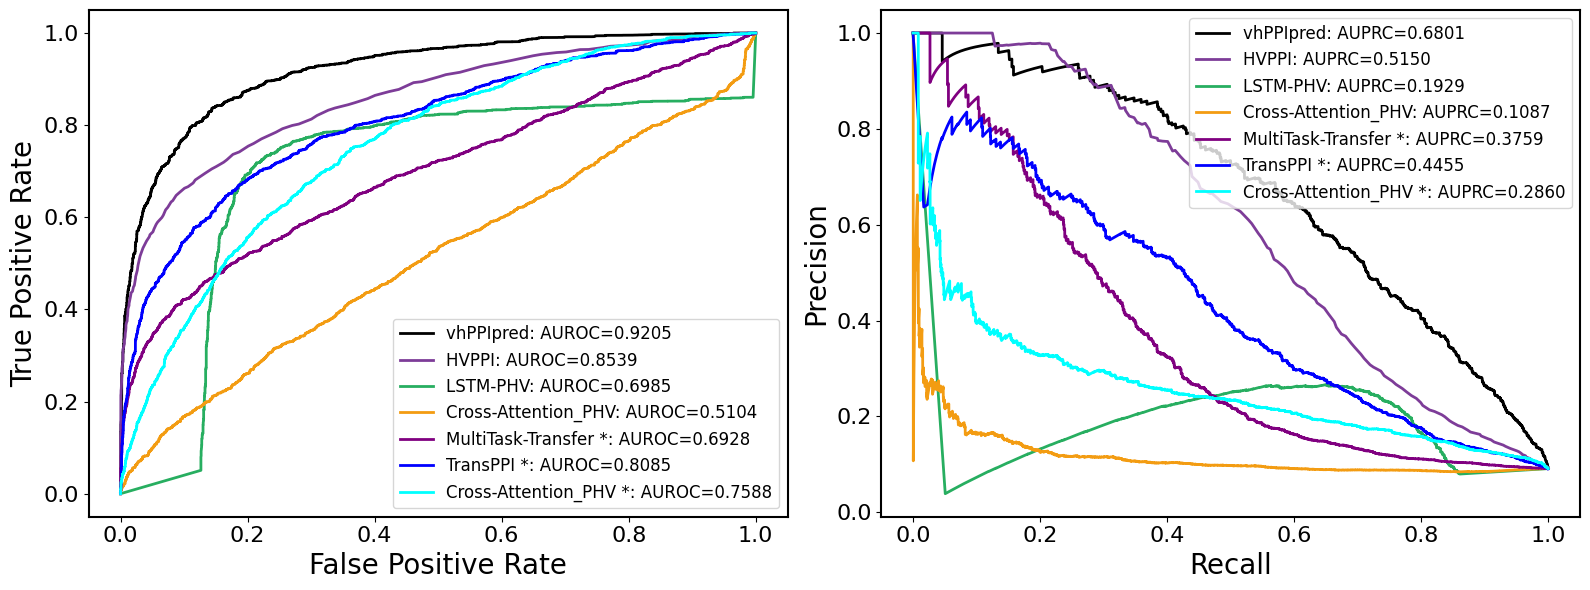

In [ ]:
dataframes = [plot_dt_vhppipred, plot_dt_hvppi, plot_dt_lstm_phv, plot_dt_caphv, plot_dt_multitasktf, plot_dt_transppi, plot_dt_caphv_2]
results = []
for df in dataframes:
    y_true = df["label"].astype(int)
    y_scores = df["pred_score"].astype(float)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_true, y_scores, pos_label=1.0)
    pr_auc = auc(recall, precision)

    results.append((roc_auc, pr_auc))

#dict_method_auroc = {"vhPPIpred":0.9205, "HVPPI":0.8539, "LSTM-PHV":0.6985, "Cross-Attention_PHV":0.5104, "MultiTask-Transfer *":0.6928, "TransPPI *":0.8085, "Cross-Attention_PHV *":0.7588}
#dict_method_auprc = {"vhPPIpred":0.6801, "HVPPI":0.5150, "LSTM-PHV":0.1929, "Cross-Attention_PHV":0.1087, "MultiTask-Transfer *":0.3759, "TransPPI *":0.4455, "Cross-Attention_PHV *":0.2860}
dict_method_auroc = {"vhPPIpred":0.921, "HVPPI":0.854, "LSTM-PHV":0.699, "Cross-Attention_PHV":0.510, "MultiTask-Transfer *":0.693, "TransPPI *":0.809, "Cross-Attention_PHV *":0.759}
dict_method_auprc = {"vhPPIpred":0.680, "HVPPI":0.515, "LSTM-PHV":0.193, "Cross-Attention_PHV":0.109, "MultiTask-Transfer *":0.376, "TransPPI *":0.446, "Cross-Attention_PHV *":0.286}

colors = [
    'black', 
    '#7d3c98',
    '#27ae60',
    '#f39c12',
    'purple',  
    'blue', 
    'cyan' 
]
linestyles = ['-','-','-','-','-','-', '-']


plt.figure(figsize=(16, 6))
# AUROC 曲线
plt.subplot(1, 2, 1)
for i, df in enumerate(dataframes):
    method = df["method"][0]
    y_true = df['label'].astype(int)
    y_scores = df['pred_score'].astype(float)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    plt.plot(fpr, tpr, color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{method}: AUROC={dict_method_auroc[method]:.3f}')

plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=18)



# AUPRC 曲线
plt.subplot(1, 2, 2)
for i, df in enumerate(dataframes):
    method = df["method"][i]
    y_true = df['label'].astype(int)
    y_scores = df['pred_score'].astype(float)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, color=colors[i], linestyle=linestyles[i], linewidth=2, label=f'{method}: AUPRC={dict_method_auprc[method]:.3f}')

plt.xlabel('Recall', fontsize=24)
plt.ylabel('Precision', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=18)

plt.tight_layout()

# 获取所有子图并调整边框
for ax in plt.gcf().axes:
    # 设置所有边框宽度
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
plt.savefig("./FigForPaper/Fig2B.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight",  # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距

plt.show()



## Figure 3. Ablation experiment of vhPPIpred and time-space complexity of prediction methods

### Figure 3. A: Performance of vhPPIpred after removing ProtT5 embedding, degree of humna protein, viral mimicry of human protein interactions and PSSM embedding.

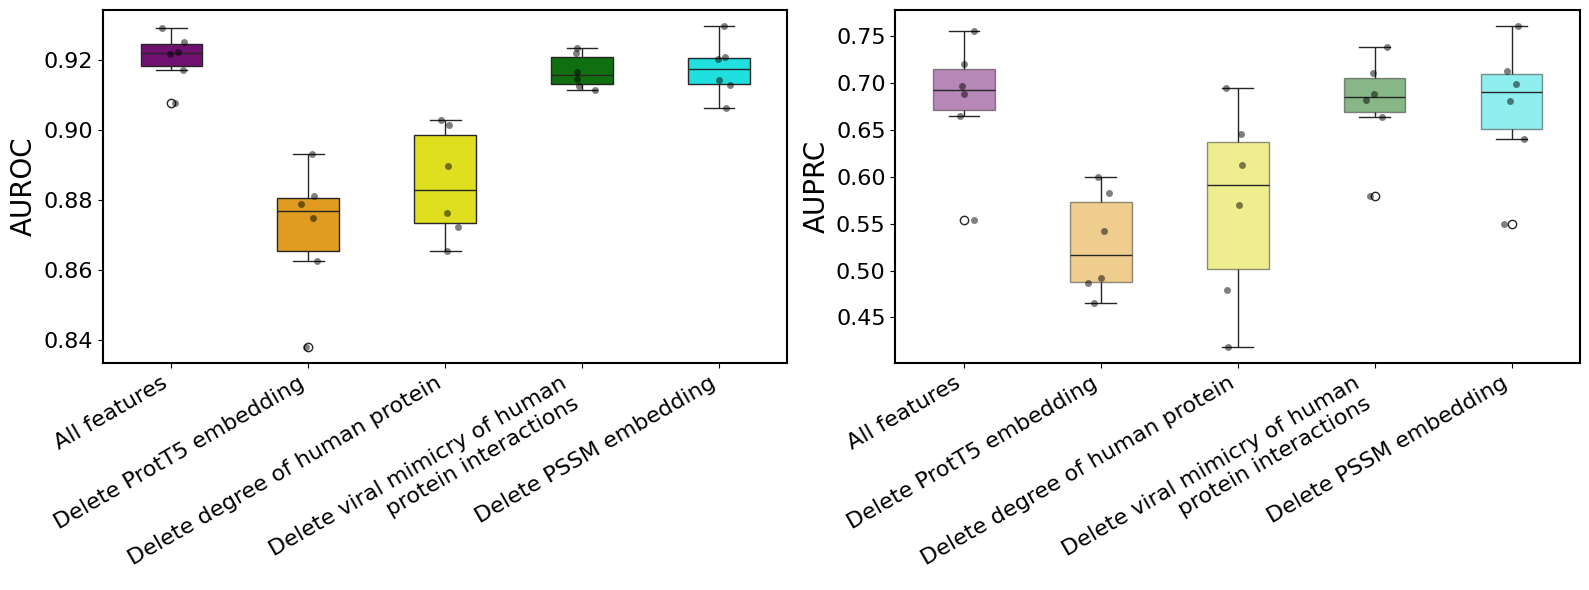

In [ ]:
def boxplot_auroc_auprc_for_ablation(dt_auroc, dt_auprc):
    plt.figure(figsize=(16, 6))

    # 原始标签
    # 手动指定换行位置
    labels = [
        'All features',
        'Delete ProtT5 embedding',
        'Delete degree of human protein',
        'Delete viral mimicry of human\nprotein interactions',
        'Delete PSSM embedding'
    ]
    
    # AUROC boxplot
    plt.subplot(1, 2, 1)
    group_colors = {"no_del":"purple", "seqEmbed_pca":"orange", "hp_degree":"yellow", "vh_simi":"green", "pssmEmbed_pca":"cyan"}
    ax1 = sns.boxplot(data=dt_auroc, x="x", y="y", palette=group_colors, width=0.45, hue="x", legend=False)
    sns.stripplot(data=dt_auroc, x='x', y='y', color='black', alpha=0.5, ax=ax1)
    ax1.set_xlabel(None)
    ax1.set_ylabel('AUROC', fontsize=24)
    plt.xticks([0, 1, 2, 3, 4], labels,fontsize=22, rotation=30, ha='right')
    plt.yticks(fontsize=22)
    
    
    # AUPRC boxplot
    plt.subplot(1, 2, 2)
    ax2 = sns.boxplot(data=dt_auprc, x="x", y="y", palette=group_colors, width=0.45, hue="x", legend=False)
    sns.stripplot(data=dt_auprc, x='x', y='y', color='black', alpha=0.5, ax=ax2)
    
    # 设置透明度
    for patch in ax2.patches:
        patch.set_alpha(0.5)  # 透明度设置为 0.5
    
    ax2.set_xlabel(None)
    ax2.set_ylabel('AUPRC', fontsize=24)
    plt.xticks([0, 1, 2, 3, 4], labels, fontsize=22, rotation=30, ha='right')
    plt.yticks(fontsize=22)
    
    plt.tight_layout()

    for ax in plt.gcf().axes:
        # 设置所有边框宽度
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)

    plt.savefig("./FigForPaper/Fig3A.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight",  # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
        
    plt.show()


if __name__ == "__main__":
    dt1 = pd.read_csv("./tmp_res/ablationexp_no_del.txt", sep="\t", names=["modelname","feat","acc","prec","rec","f1","auroc","auprc"])
    dt2 = pd.read_csv("./tmp_res/ablationexp_seqEmbed_pca.txt", sep="\t", names=["modelname","feat","acc","prec","rec","f1","auroc","auprc"])
    dt3 = pd.read_csv("./tmp_res/ablationexp_hp_degree.txt", sep="\t", names=["modelname","feat","acc","prec","rec","f1","auroc","auprc"])
    dt4 = pd.read_csv("./tmp_res/ablationexp_vh_simi.txt", sep="\t", names=["modelname","feat","acc","prec","rec","f1","auroc","auprc"])
    dt5 = pd.read_csv("./tmp_res/ablationexp_pssmEmbed_pca.txt", sep="\t", names=["modelname","feat","acc","prec","rec","f1","auroc","auprc"])
    dt_auroc, dt_auprc = [], []
    for i in range(dt1.shape[0]):
        dt_auroc.append(["no_del",dt1["auroc"][i]])
        dt_auprc.append(["no_del",dt1["auprc"][i]])
    for i in range(dt2.shape[0]):
        dt_auroc.append(["seqEmbed_pca",dt2["auroc"][i]])
        dt_auprc.append(["seqEmbed_pca",dt2["auprc"][i]])
    for i in range(dt3.shape[0]):
        dt_auroc.append(["hp_degree",dt3["auroc"][i]])
        dt_auprc.append(["hp_degree",dt3["auprc"][i]])
    for i in range(dt4.shape[0]):
        dt_auroc.append(["vh_simi",dt4["auroc"][i]])
        dt_auprc.append(["vh_simi",dt4["auprc"][i]])
    for i in range(dt5.shape[0]):
        dt_auroc.append(["pssmEmbed_pca",dt5["auroc"][i]])
        dt_auprc.append(["pssmEmbed_pca",dt5["auprc"][i]])

    dt_auroc = pd.DataFrame(dt_auroc, columns=["x","y"])
    dt_auprc = pd.DataFrame(dt_auprc, columns=["x","y"])
    boxplot_auroc_auprc_for_ablation(dt_auroc=dt_auroc, dt_auprc=dt_auprc)
    
        
    
    

### Figure 3. B: Time consumption and memory usage measured during predictions on dataset of varying sample sizes

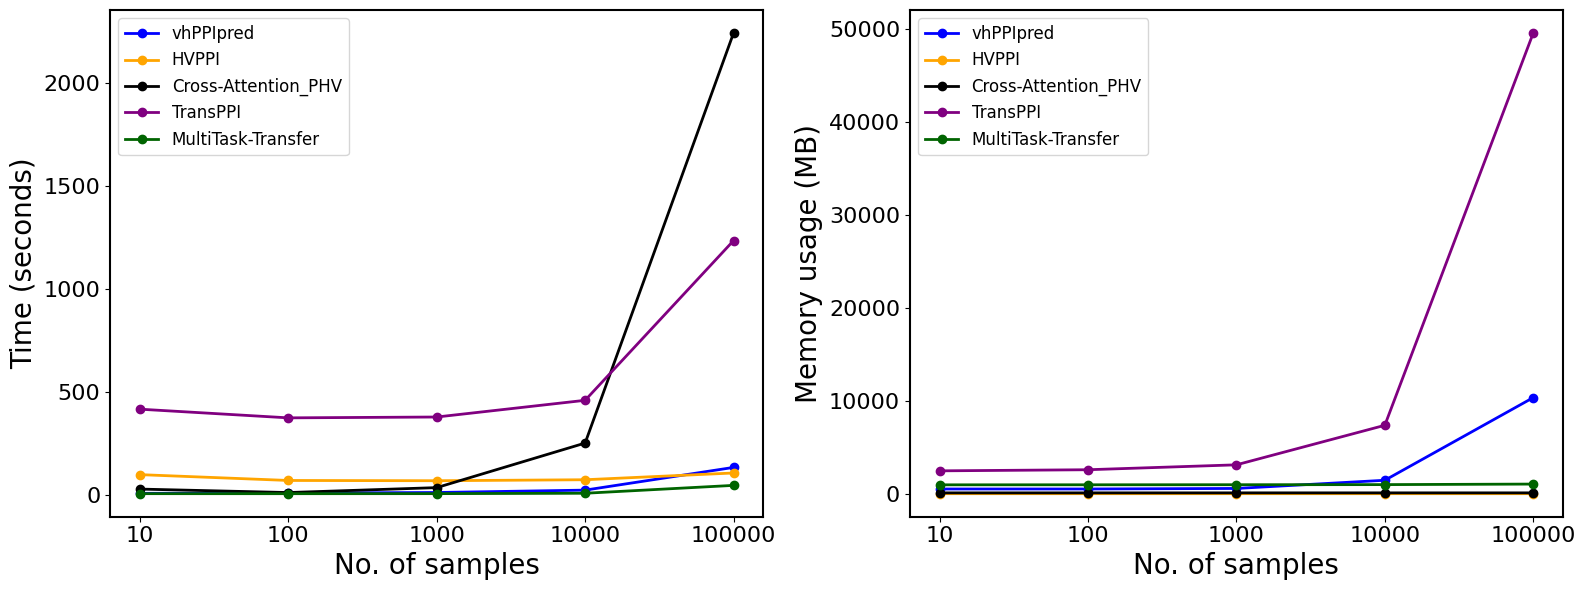

In [ ]:
def dealDAT(datfile):
    memory_usage_list, time_list = [], []
    with open(datfile) as inF:
        for line in inF:
            line = line.strip().split()
            if line[0] == "CMDLINE":
                continue
            else:
                memory_usage_list.append(float(line[1]))
                time_list.append(float(line[2]))
    time_usage_list = [t-time_list[0] for t in time_list]
    return memory_usage_list, time_usage_list

def figPlot():
    x = np.array(['10', '100', '1000', '10000', '100000'])
    
    ## vhPPIpred
    vhppipred_dt10_memory_list, vhppipred_dt10_time_list = dealDAT(datfile="./tmp_res/tsa_vhppi_dt10.dat")
    vhppipred_dt100_memory_list, vhppipred_dt100_time_list = dealDAT(datfile="./tmp_res/tsa_vhppi_dt100.dat")
    vhppipred_dt1000_memory_list, vhppipred_dt1000_time_list = dealDAT(datfile="./tmp_res/tsa_vhppi_dt1000.dat")
    vhppipred_dt10000_memory_list, vhppipred_dt10000_time_list = dealDAT(datfile="./tmp_res/tsa_vhppi_dt10000.dat")
    vhppipred_dt100000_memory_list, vhppipred_dt100000_time_list = dealDAT(datfile="./tmp_res/tsa_vhppi_dt100000.dat")
    vhppipred_memory_list = np.array([max(vhppipred_dt10_memory_list), max(vhppipred_dt100_memory_list), max(vhppipred_dt1000_memory_list), max(vhppipred_dt10000_memory_list), max(vhppipred_dt100000_memory_list)])
    vhppipred_time_list = np.array([max(vhppipred_dt10_time_list), max(vhppipred_dt100_time_list), max(vhppipred_dt1000_time_list), max(vhppipred_dt10000_time_list), max(vhppipred_dt100000_time_list)])
    
    ## HVPPI
    hvppi_dt10_memory_list, hvppi_dt10_time_list = dealDAT(datfile="./tmp_res/tsa_hvppi_dt10.dat")
    hvppi_dt100_memory_list, hvppi_dt100_time_list = dealDAT(datfile="./tmp_res/tsa_hvppi_dt100.dat")
    hvppi_dt1000_memory_list, hvppi_dt1000_time_list = dealDAT(datfile="./tmp_res/tsa_hvppi_dt1000.dat")
    hvppi_dt10000_memory_list, hvppi_dt10000_time_list = dealDAT(datfile="./tmp_res/tsa_hvppi_dt10000.dat")
    hvppi_dt100000_memory_list, hvppi_dt100000_time_list = dealDAT(datfile="./tmp_res/tsa_hvppi_dt100000.dat")
    hvppi_memory_list = np.array([max(hvppi_dt10_memory_list), max(hvppi_dt100_memory_list), max(hvppi_dt1000_memory_list), max(hvppi_dt10000_memory_list), max(hvppi_dt100000_memory_list)])
    hvppi_time_list = np.array([max(hvppi_dt10_time_list), max(hvppi_dt100_time_list), max(hvppi_dt1000_time_list), max(hvppi_dt10000_time_list), max(hvppi_dt100000_time_list)])
    
    ## Cross-Attention_PHV (pretrained model)
    caphv_dt10_memory_list, caphv_dt10_time_list = dealDAT(datfile="./tmp_res/tsa_caphv_dt10.dat")
    caphv_dt100_memory_list, caphv_dt100_time_list = dealDAT(datfile="./tmp_res/tsa_caphv_dt100.dat")
    caphv_dt1000_memory_list, caphv_dt1000_time_list = dealDAT(datfile="./tmp_res/tsa_caphv_dt1000.dat")
    caphv_dt10000_memory_list, caphv_dt10000_time_list = dealDAT(datfile="./tmp_res/tsa_caphv_dt10000.dat")
    caphv_dt100000_memory_list, caphv_dt100000_time_list = dealDAT(datfile="./tmp_res/tsa_caphv_dt100000.dat")
    caphv_memory_list = np.array([max(caphv_dt10_memory_list), max(caphv_dt100_memory_list), max(caphv_dt1000_memory_list), max(caphv_dt10000_memory_list), max(caphv_dt100000_memory_list)])
    caphv_time_list = np.array([max(caphv_dt10_time_list), max(caphv_dt100_time_list), max(caphv_dt1000_time_list), max(caphv_dt10000_time_list), max(caphv_dt100000_time_list)])

    ## TransPPI (retrained model)
    transppi_dt10_memory_list, transppi_dt10_time_list = dealDAT(datfile="./tmp_res/tsa_transppi_dt10.dat")
    transppi_dt100_memory_list, transppi_dt100_time_list = dealDAT(datfile="./tmp_res/tsa_transppi_dt100.dat")
    transppi_dt1000_memory_list, transppi_dt1000_time_list = dealDAT(datfile="./tmp_res/tsa_transppi_dt1000.dat")
    transppi_dt10000_memory_list, transppi_dt10000_time_list = dealDAT(datfile="./tmp_res/tsa_transppi_dt10000.dat")
    transppi_dt100000_memory_list, transppi_dt100000_time_list = dealDAT(datfile="./tmp_res/tsa_transppi_dt100000.dat")
    transppi_memory_list = np.array([max(transppi_dt10_memory_list), max(transppi_dt100_memory_list), max(transppi_dt1000_memory_list), max(transppi_dt10000_memory_list), max(transppi_dt100000_memory_list)])
    transppi_time_list = np.array([max(transppi_dt10_time_list), max(transppi_dt100_time_list), max(transppi_dt1000_time_list), max(transppi_dt10000_time_list), max(transppi_dt100000_time_list)])

    ## MultiTask Transfer (retrained model)
    mttf_dt10_memory_list, mttf_dt10_time_list = dealDAT(datfile="./tmp_res/tsa_multitasktf_dt10.dat")
    mttf_dt100_memory_list, mttf_dt100_time_list = dealDAT(datfile="./tmp_res/tsa_multitasktf_dt100.dat")
    mttf_dt1000_memory_list, mttf_dt1000_time_list = dealDAT(datfile="./tmp_res/tsa_multitasktf_dt1000.dat")
    mttf_dt10000_memory_list, mttf_dt10000_time_list = dealDAT(datfile="./tmp_res/tsa_multitasktf_dt10000.dat")
    mttf_dt100000_memory_list, mttf_dt100000_time_list = dealDAT(datfile="./tmp_res/tsa_multitasktf_dt100000.dat")
    mttf_memory_list = np.array([max(mttf_dt10_memory_list), max(mttf_dt100_memory_list), max(mttf_dt1000_memory_list), max(mttf_dt10000_memory_list), max(mttf_dt100000_memory_list)])
    mttf_time_list = np.array([max(mttf_dt10_time_list), max(mttf_dt100_time_list), max(mttf_dt1000_time_list), max(mttf_dt10000_time_list), max(mttf_dt100000_time_list)])

    
    ## Fig plot
    colors = ['blue', 'orange', 'black', 'purple', 'darkgreen']
    
    # 绘制折线图
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, vhppipred_time_list, color=colors[0], marker='o', label='vhPPIpred', linewidth=2)
    plt.plot(x, hvppi_time_list, color=colors[1], marker='o', label='HVPPI', linewidth=2)
    plt.plot(x, caphv_time_list, color=colors[2], marker='o', label='Cross-Attention_PHV', linewidth=2)
    plt.plot(x, transppi_time_list, color=colors[3], marker='o', label='TransPPI', linewidth=2)
    plt.plot(x, mttf_time_list, color=colors[4], marker='o', label='MultiTask-Transfer', linewidth=2)
    
    # 添加图例和标签
    plt.xlabel('No. of samples', fontsize=24)
    plt.ylabel('Time (seconds)', fontsize=24)
    plt.xticks(x, fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=18)
    
    plt.subplot(1, 2, 2)
    plt.plot(x, vhppipred_memory_list, color=colors[0], marker='o', label='vhPPIpred', linewidth=2)
    plt.plot(x, hvppi_memory_list, color=colors[1], marker='o', label='HVPPI', linewidth=2)
    plt.plot(x, caphv_memory_list, color=colors[2], marker='o', label='Cross-Attention_PHV', linewidth=2)
    plt.plot(x, transppi_memory_list, color=colors[3], marker='o', label='TransPPI', linewidth=2)
    plt.plot(x, mttf_memory_list, color=colors[4], marker='o', label='MultiTask-Transfer', linewidth=2)
    
    # 添加图例和标签
    plt.xlabel('No. of samples', fontsize=24)
    plt.ylabel('Memory usage (MB)', fontsize=24)
    plt.xticks(x, fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(fontsize=18)

    # 获取所有子图并调整边框
    for ax in plt.gcf().axes:
        # 设置所有边框宽度
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)
    
    # 显示图形
    plt.tight_layout()
    
    plt.savefig("./FigForPaper/Fig3B.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight",  # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
    
    plt.show()
        

def main():
    figPlot()
    


if __name__ == "__main__":
    main()

## Supplemental Figure 1. Jaccard index of human proteins between groups in our benchmark dataset

<Figure size 800x800 with 0 Axes>

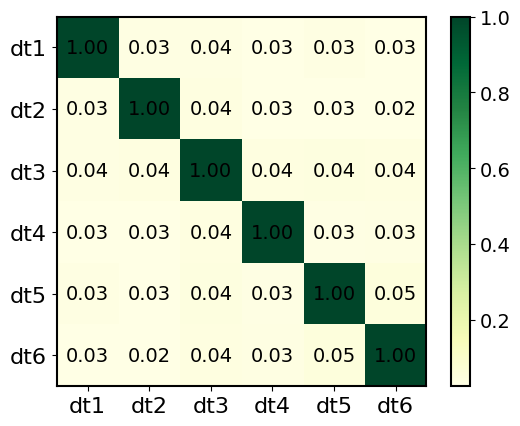

In [ ]:
## overlap of human protein cluster

dt_virus_cluster_pos = pd.read_csv("./dataset/virus_prots_posRes_cluster.tsv", sep="\t", names=["cluster","representative"])
dt_virus_cluster_neg = pd.read_csv("./dataset/virus_prots_nohuman_virus_protsRes_cluster.tsv", sep="\t", names=["cluster","representative"])
dict_pos_virus_cluster = {dt_virus_cluster_pos["representative"][i]:dt_virus_cluster_pos["cluster"][i] for i in range(dt_virus_cluster_pos.shape[0])}
dict_neg_virus_cluster = {dt_virus_cluster_neg["representative"][i]:dt_virus_cluster_neg["cluster"][i] for i in range(dt_virus_cluster_neg.shape[0])}

dt_res = pd.read_csv("./dataset/data_fold10_info.csv", sep="\t", header=0)
dt_res_pos = dt_res[dt_res["label"]==1.0].reset_index(drop=True)
dt_res_neg = dt_res[dt_res["label"]==0.0].reset_index(drop=True)
dt_res_pos["virus_cluster"] = [dict_pos_virus_cluster[dt_res_pos["virus_unid"][i]] for i in range(dt_res_pos.shape[0])]
dt_res_neg["virus_cluster"] = [dict_neg_virus_cluster[dt_res_neg["virus_unid"][i]] for i in range(dt_res_neg.shape[0])]

dt_res_concat = pd.concat([dt_res_pos, dt_res_neg], ignore_index=True)

dt_dataset_fold10 = dt_res_concat
dt_dataset_fold10_pos = dt_dataset_fold10[dt_dataset_fold10["label"]==1.0].reset_index(drop=True)
dt_dataset_fold10_neg = dt_dataset_fold10[dt_dataset_fold10["label"]==0.0].reset_index(drop=True)

##-----------------
overlapMatrix = np.zeros((6,6))
for i in range(1,7):
    dt_i = dt_dataset_fold10[dt_dataset_fold10["group"]=="gp_"+str(i)].reset_index(drop=True)
    set_i_hp = set(dt_i["human_cluster"])
    for j in range(1,7):
        dt_j = dt_dataset_fold10[dt_dataset_fold10["group"]=="gp_"+str(j)].reset_index(drop=True)
        set_j_hp = set(dt_j["human_cluster"])
        ## 计算杰卡德距离 = 1-杰卡德相似性 (距离越大与不相似，越小越相似)
        jaccard_similarity = len(set_i_hp & set_j_hp)/len(set_i_hp | set_j_hp)
        overlapMatrix[i-1, j-1] = jaccard_similarity

xLabel = ["dt1", "dt2", "dt3", "dt4", "dt5", "dt6"]
yLabel = ["dt1", "dt2", "dt3", "dt4", "dt5", "dt6"]

plt.figure(figsize=(18, 18))
fig, ax = plt.subplots()
ax.set_yticks(range(len(yLabel)))
ax.set_yticklabels(yLabel)
ax.set_xticks(range(len(xLabel)))
ax.set_xticklabels(xLabel)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

im = ax.imshow(overlapMatrix, cmap="YlGn")
for i in range(len(yLabel)):
    for j in range(len(xLabel)):
        ax.text(j, i, '{:.2f}'.format(overlapMatrix[i, j]), ha="center", va="center", color="black", fontsize=18)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=18)  # 刻度标签大小

for ax in plt.gcf().axes:
    # 设置所有边框宽度
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

plt.savefig("./FigForPaper/SupplFig1.pdf",
            format="pdf", 
            dpi=300,  # 高分辨率
            bbox_inches="tight",  # 防止内容被裁剪
            pad_inches=0.1)  # 添加少许边距
        
plt.show()

## Supplemental Figure 2. Training and validation log loss and classification error changes across n_estimators at different learning rates (LR) in vhPPIpred

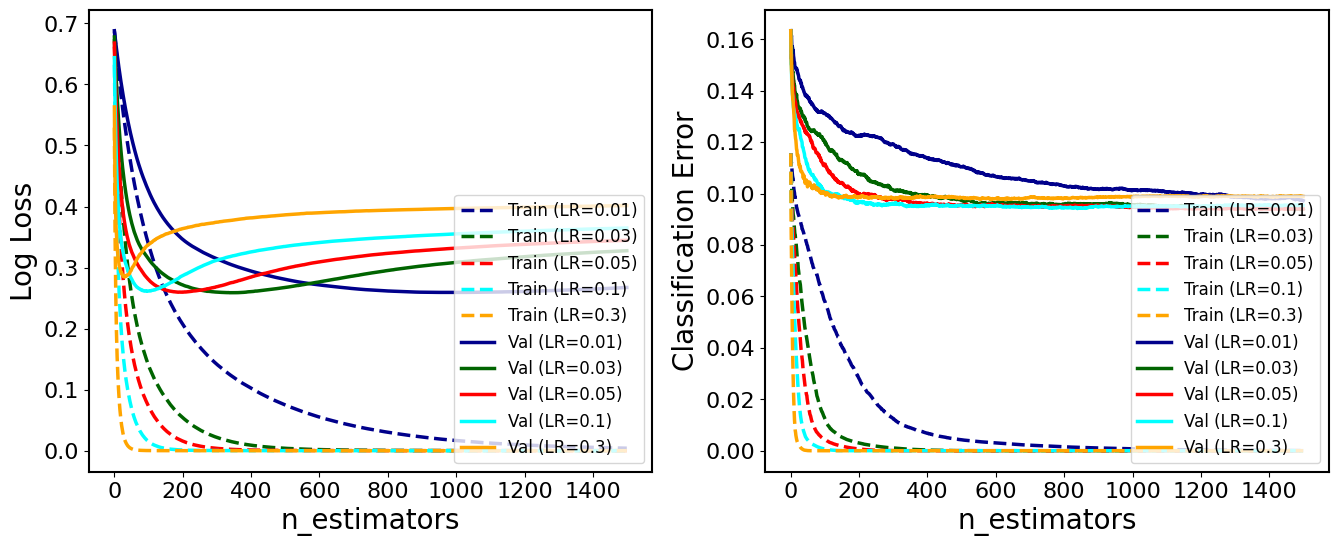

In [ ]:
## 可视化 error & loss，确定 n_estimators 和 learning_rate
from matplotlib.lines import Line2D

def show_cv_error_loss(logfile):
    dt_train_loss, dt_val_loss, dt_train_error, dt_val_error = [], [], [], []
    with open(logfile) as inF:
        for line in inF:
            train_loss, val_loss, train_error, val_error = line.strip().split("\t")[-4].strip()[1:-1], line.strip().split("\t")[-3].strip()[1:-1], line.strip().split("\t")[-2].strip()[1:-1], line.strip().split("\t")[-1].strip()[1:-1]
            train_loss, val_loss, train_error, val_error = train_loss.split(","), val_loss.split(","), train_error.split(","), val_error.split(",")
            dt_train_loss.append(train_loss)
            dt_val_loss.append(val_loss)
            dt_train_error.append(train_error)
            dt_val_error.append(val_error)
    dt_train_loss = pd.DataFrame(dt_train_loss, dtype=float).T
    dt_val_loss = pd.DataFrame(dt_val_loss, dtype=float).T
    dt_train_error = pd.DataFrame(dt_train_error, dtype=float).T
    dt_val_error = pd.DataFrame(dt_val_error, dtype=float).T

    dt_train_loss["avg_train_loss"] = dt_train_loss.mean(axis=1)
    dt_val_loss["avg_val_loss"] = dt_val_loss.mean(axis=1)
    dt_train_error["avg_train_error"] = dt_train_error.mean(axis=1)
    dt_val_error["avg_val_error"] = dt_val_error.mean(axis=1)

    learning_rate = logfile.split("-")[-1][0:-4]
    return learning_rate, list(dt_train_loss["avg_train_loss"]), list(dt_val_loss["avg_val_loss"]), list(dt_train_error["avg_train_error"]), list(dt_val_error["avg_val_error"])


def runShow():
    logfileList = [f for f in os.listdir("./tmp_res/") if f.startswith("cvlog-xgboost")]
    dict_train_loss, dict_val_loss, dict_train_error, dict_val_error = {}, {}, {}, {}
    for logfile in logfileList:
        lr, tl, vl, te, ve = show_cv_error_loss(logfile="./tmp_res/"+logfile)
        if float(lr) in  [0.01, 0.03, 0.05, 0.1, 0.3]:
            dict_train_loss[lr] = tl
            dict_val_loss[lr] = vl
            dict_train_error[lr] = te
            dict_val_error[lr] = ve
        
    # 将学习率转换为float并排序
    sorted_lrs = sorted(dict_train_loss.keys(), key=float)
    colors = [
    'darkblue', 
    'darkgreen',
    'red',
    'cyan',
    'orange'
    ]
    plt.figure(figsize=(20, 6))
    plt.subplots_adjust(wspace=0.25)
    
    # 创建自定义图例的句柄和标签
    legend_handles = []
    legend_labels = []
    
    plt.subplot(1, 2, 1)
    # 先画所有的训练损失线
    for i, lr in enumerate(sorted_lrs):
        plt.plot(range(0,len(dict_train_loss[lr])), dict_train_loss[lr], 
                color=colors[i], linestyle='--', linewidth=2.5)
    # 再画所有的验证损失线
    for i, lr in enumerate(sorted_lrs):
        plt.plot(range(0,len(dict_val_loss[lr])), dict_val_loss[lr], 
                color=colors[i], linestyle='-', linewidth=2.5)
    
    # 创建自定义图例项
    for i, lr in enumerate(sorted_lrs):
        legend_handles.append(Line2D([0], [0], color=colors[i], linestyle='--', linewidth=2.5))
        legend_labels.append(f'Train (LR={lr})')
    for i, lr in enumerate(sorted_lrs):
        legend_handles.append(Line2D([0], [0], color=colors[i], linestyle='-', linewidth=2.5))
        legend_labels.append(f'Val (LR={lr})')
    
    plt.xlabel('n_estimators', fontsize=24)
    plt.ylabel('Log Loss', fontsize=24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(legend_handles, legend_labels, loc="lower right", fontsize=18)

    # 同样的处理方式应用于第二个子图
    legend_handles = []
    legend_labels = []
    
    plt.subplot(1, 2, 2)
    # 先画所有的训练误差线
    for i, lr in enumerate(sorted_lrs):
        plt.plot(range(0,len(dict_train_error[lr])), dict_train_error[lr], 
                color=colors[i], linestyle='--', linewidth=2.5)
    # 再画所有的验证误差线
    for i, lr in enumerate(sorted_lrs):
        plt.plot(range(0,len(dict_val_error[lr])), dict_val_error[lr], 
                color=colors[i], linestyle='-', linewidth=2.5)
    
    # 创建自定义图例项
    for i, lr in enumerate(sorted_lrs):
        legend_handles.append(Line2D([0], [0], color=colors[i], linestyle='--', linewidth=2.5))
        legend_labels.append(f'Train (LR={lr})')
    for i, lr in enumerate(sorted_lrs):
        legend_handles.append(Line2D([0], [0], color=colors[i], linestyle='-', linewidth=2.5))
        legend_labels.append(f'Val (LR={lr})')
    
    plt.xlabel('n_estimators', fontsize=24)
    plt.ylabel('Classification Error', fontsize=24)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.legend(legend_handles, legend_labels, loc="lower right", fontsize=18)

    for ax in plt.gcf().axes:
        # 设置所有边框宽度
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)

    plt.savefig("./FigForPaper/SupplFig2.pdf",
        format="pdf", 
        dpi=300,  # 高分辨率
        bbox_inches="tight",  # 防止内容被裁剪
        pad_inches=0.1)  # 添加少许边距
    plt.show()
## -------
runShow()
